In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LeaveOneOut, ShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.metrics import confusion_matrix


# Data Prep

In [40]:
titanic = sns.load_dataset('titanic')
titanic = titanic[["survived", "pclass", "sex", "age"]]
titanic.dropna(axis=0, inplace=True)
titanic.replace({'male': 0, 'female': 1}, inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [41]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

# Train Set / Tet Set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)

(571, 3)
(143, 3)


In [43]:
param_grid = {'n_neighbors': np.arange(1, 20),
                'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [44]:
grid.best_score_

0.7810983981693363

In [45]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [46]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.7202797202797203

In [63]:
cv = KFold(n_splits=5, shuffle=True, random_state=5)
scores = cross_val_score(model, X, y, cv=cv)

print(scores)

[0.71328671 0.74125874 0.71328671 0.8041958  0.79577465]


In [48]:
confusion_matrix(y_test, model.predict(X_test))

array([[72, 16],
       [24, 31]], dtype=int64)

[ 45  91 136 182 228 273 319 364 410 456]


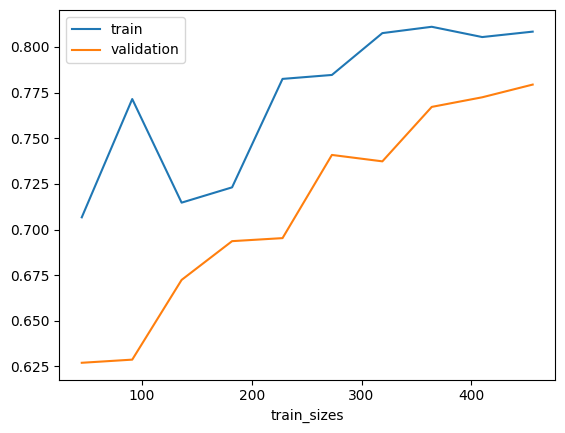

In [49]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()